# Assignment 2 - Weather
---------
Program that reads the temperature and time from csv file and then it will create a plot with the temperature along the time.

In [2]:
import csv

FILENAME = "weatherreadings1.csv"

DATADIR = "./csv/"

with open (DATADIR + FILENAME, "rt") as fp:
    reader = csv.reader(fp, delimiter=",")
    linecount = 0
    for line in reader:
        if not linecount:
            print (f"{line[1]}, {line[13]}\n______") # Column 1 is "reportStartDateTime" and 13 is the "dryBulbTemperature_Celsius".
        else:
            print (f"{line[1]}, {line[13]}")
        linecount += 1


reportStartDateTime, dryBulbTemperature_Celsius
______
2024-10-02 16:15:00, 15.944444444444446
2024-10-02 16:45:00, 15.777777777777777
2024-10-02 17:00:00, 15.111111111111112
2024-10-02 17:15:00, 14.277777777777779
2024-10-02 17:30:00, 13.666666666666668
2024-10-02 17:45:00, 13.22222222222222
2024-10-02 18:00:00, 12.999999999999998
2024-10-02 18:15:00, 12.5
2024-10-02 18:30:00, 11.944444444444445
2024-10-02 18:45:00, 11.500000000000002
2024-10-02 19:00:00, 11.11111111111111
2024-10-02 19:15:00, 10.833333333333334
2024-10-02 19:30:00, 10.555555555555555
2024-10-02 19:45:00, 10.277777777777777
2024-10-02 20:00:00, 10.222222222222221
2024-10-02 20:15:00, 10.055555555555555
2024-10-02 20:30:00, 9.944444444444443
2024-10-02 20:45:00, 9.888888888888888
2024-10-02 21:00:00, 10.333333333333334
2024-10-02 21:15:00, 10.72222222222222
2024-10-02 21:30:00, 10.999999999999998
2024-10-02 21:45:00, 11.222222222222223
2024-10-02 22:00:00, 11.11111111111111
2024-10-02 22:15:00, 10.999999999999998
2024-

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

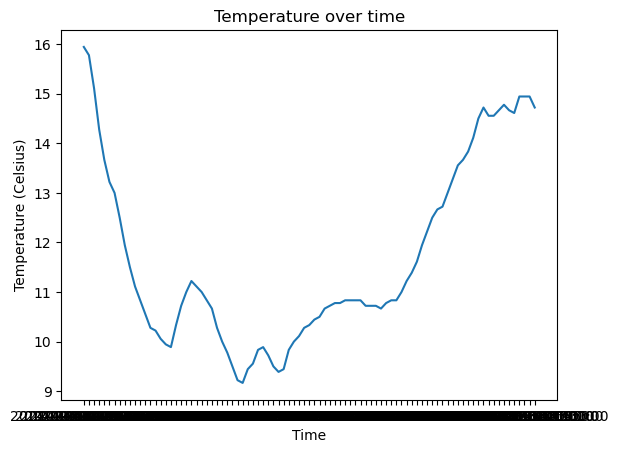

In [4]:
logFilename = DATADIR + FILENAME

df = pd.read_csv(logFilename)

x = df["reportStartDateTime"]
y = df["dryBulbTemperature_Celsius"]

fig, ax = plt.subplots()

ax.plot(x,y)

ax.set(xlabel="Time", ylabel="Temperature (Celsius)", title="Temperature over time")

plt.show()

In [5]:
# Need to clean the data so it can be considered as a datetime object.

# https://www.geeksforgeeks.org/replacing-column-value-of-a-csv-file-in-python/

# reading the CSV file.
text = open(logFilename, "r") 
  
# join() will allow to identify the data of csv as a string.
text = "".join([i for i in text])  
  
# search and replace the contents .
text = text.replace("2T", "2 ")  
text = text.replace("3T", "3 ")
text = text.replace("+00:00", "")
  
# write in csv and close it.
weather = open(logFilename,"w") 
weather.writelines(text) 
weather.close()

In [6]:
# Check the result
print(x) 

0     2024-10-02 16:15:00
1     2024-10-02 16:45:00
2     2024-10-02 17:00:00
3     2024-10-02 17:15:00
4     2024-10-02 17:30:00
             ...         
84    2024-10-03 14:00:00
85    2024-10-03 14:15:00
86    2024-10-03 14:30:00
87    2024-10-03 14:45:00
88    2024-10-03 15:00:00
Name: reportStartDateTime, Length: 89, dtype: object


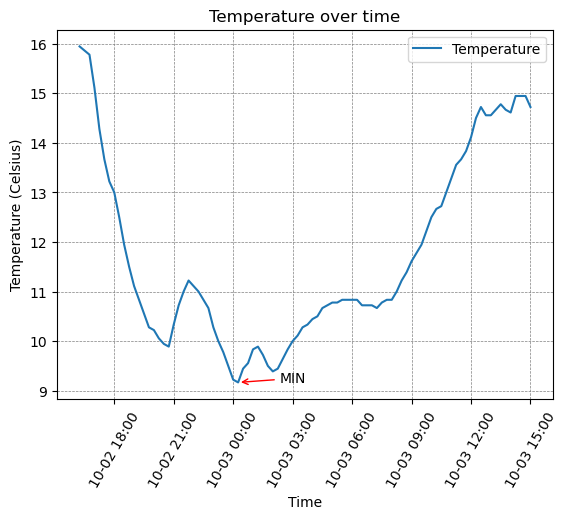

In [50]:
# Need to fix the x axis, for a better representation.

# https://stackoverflow.com/questions/1574088/plotting-time-on-the-independent-axis
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas.to_datetime
# https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
# https://www.w3schools.com/python/matplotlib_grid.asp

import matplotlib.dates as mdates

# convert object to datetime.
x = pd.to_datetime(x) 

myFmt = mdates.DateFormatter("%m-%d %H:%M")
plt.gca().xaxis.set_major_formatter(myFmt)

plt.plot(x, y, label="Temperature")
plt.title("Temperature over time")
plt.xlabel("Time")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.grid(color="grey", linestyle='--', linewidth=0.5)
plt.xticks(rotation=60)
plt.annotate("MIN", (x[31], y[31]), xytext=(30, 0), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
# https://stackoverflow.com/questions/11067368/annotate-time-series-plot

plt.show()

## End